# Overview
We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.
In the lending industry, investors provide loans to borrowers in exchange for the promise of repayment with interest. If the borrower repays the loan, then the lender would make profit from the interest. However, if the borrower fails to repay the loan, then the lender loses money. Therefore, lenders face the problem of predicting the risk of a borrower being unable to repay a loan.Our objects isfind relevant factors that influence whether a borrower will pay or not.Build a model that predicts wheter the borrower will pay or not.Create a consumer profile of borrowers that pay or not.Make conclusions and reccomendations to improve bussiness operations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score,f1_score, roc_auc_score, roc_curve,plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (2).zip')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


We have no missing values. It might be possible that the cleaning process extend itself until the descriptive analysis, where is possible that suspicious data comes up.

We are also going to take a look at the data types and modify them if they are inconsistent.

In [ ]:
df["credit.policy"] = df["credit.policy"].astype("bool")
df["not.fully.paid"] = df["not.fully.paid"].astype("bool")

In [ ]:
df.describe()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000
50%,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000
75%,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000


# Data Analysis and EDA
We know that most of the features are numeric, having only one categorical and two booleans, one of which being our target variable which is our target variable. This makes our descriptive analysis quite easy since we only have to graph histograms corresponding to the numeric values, a bar plot for the categorical feature an another barplot for the boolean.

Since our target variable is a boolean, we are going to plot the 6 scatter plots with the highest correlations and hue them with the target variable, this will be more as a visual analysis. If we don't find any pattern, I'm going to apply a model-based feature selection to reduce the number of features and analyze the most relevants for the model.

'Purpose' is a categorical variable, so a barplot will do.

'inq.last.6mths', 'delinq.2yrs' and 'pub.rec'describbe the number of times something happened, a barplot will also work on these cases.

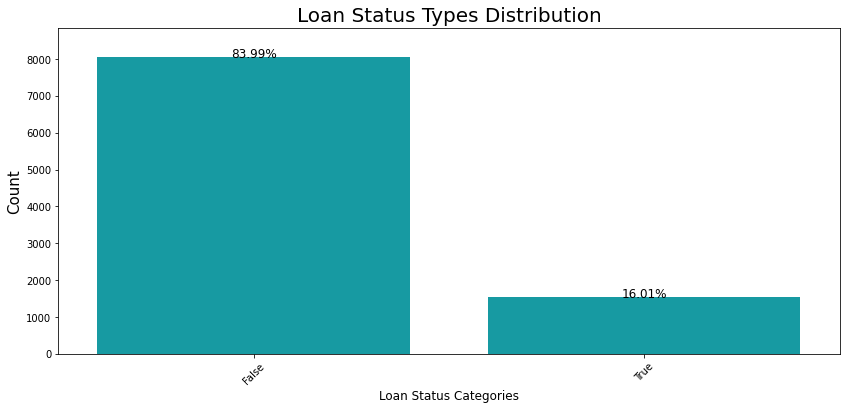

In [ ]:
total = len(df)

plt.figure(figsize = (14,6))

g = sns.countplot(x="not.fully.paid", data=df, 
                  color='#00afb9')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

83.99% is fully paid and 16.01% is charged off
we have a case of inbalanced data that could be a problem for the ML model since most of are false. When building the model, we are going to apply sampling technique to deal with the imbalanced data.

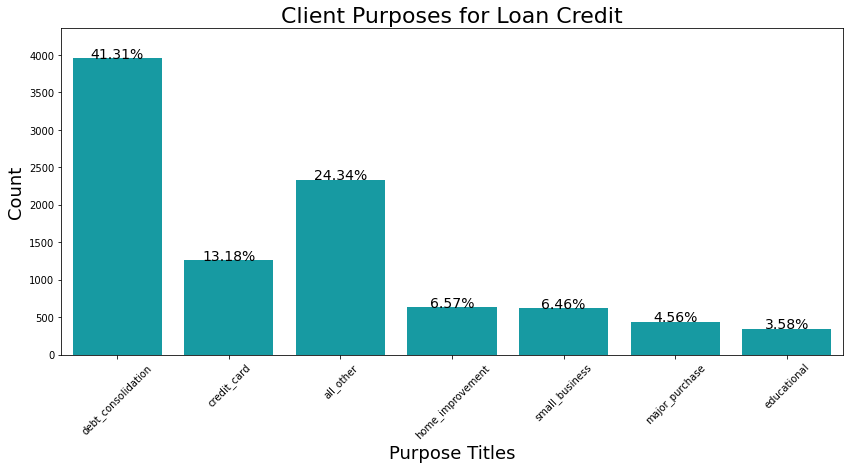

In [ ]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=df, 
                  color='#00afb9')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()

Cool! The top 3 purposes are:

41.31% of the Loans are to Debt Consolidation

13.18% are to pay Credit Card

6.57% to Home Improvement


From the descriptive analysis we can see that most of the borrowers are for debt consolidation . The least category is educational. It is too soon to start concluding, but my intuition tells me that the categories with the most borrowers are also the ones with a bigger proportion of paid debt, as educational sits at the bottom having students with the least amount of money. We will wait though until the analysis part where we are going to analyse further.

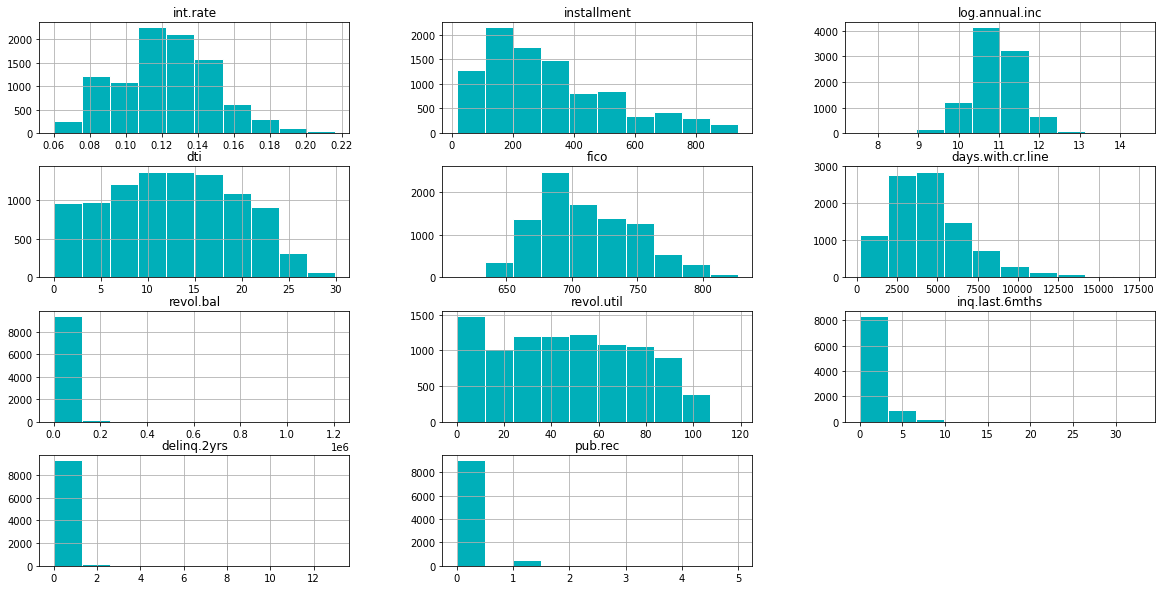

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000
50%,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000
75%,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000


In [ ]:
numbers = df.select_dtypes(['int64', 'float64']).columns
df[numbers].hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()

df[numbers].describe()

We can see that most of the histograms follow a normal distribution, except for revol.bal, which, from the descriptive stats, know that have some very extreme values, this could be fixed by removing the outiler or applyieng a log formula .

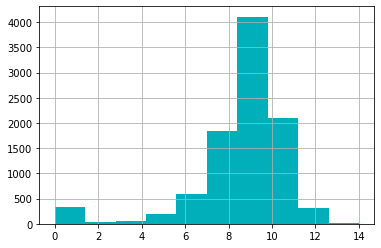

In [ ]:
TotalLog = np.log(df['revol.bal'] + 1)
TotalLog.hist(color='#00afb9')

plt.show()

With the log formula, the graph looks more 'normal'. We are going to take into account both method when building the ML model.

Regarding 'delinq.2yrs' and 'pub.rec', these are distributions that have their values distributed through 4-5 values. They behave like a cateforical value but they are not. A count plot could give us a better representation of these distributions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


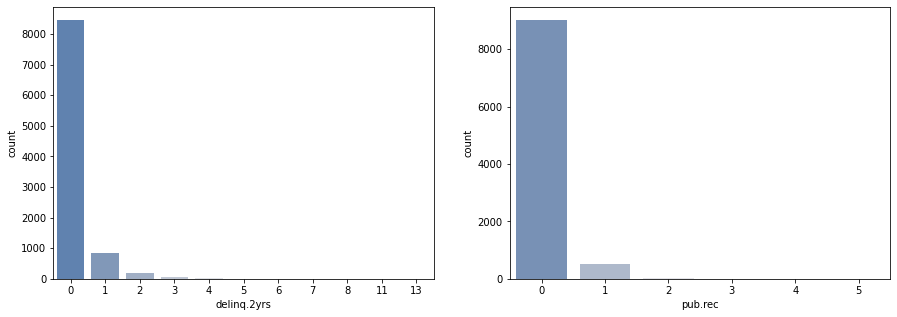

0     8458
1      832
2      192
3       65
4       19
5        6
6        2
13       1
7        1
8        1
11       1
Name: delinq.2yrs, dtype: int64

 0    9019
1     533
2      19
3       5
4       1
5       1
Name: pub.rec, dtype: int64


In [ ]:
from matplotlib import colors
fig, ax = plt.subplots(1,2, figsize=(15,5))

inte = ['delinq.2yrs', 'pub.rec']

sns.countplot(inte[0], data=df, ax=ax[0], palette="vlag")
sns.countplot(inte[1], data=df, ax=ax[1], palette="vlag")

plt.show()

print(df[inte[0]].value_counts())
print('\n', df[inte[1]].value_counts())

We can see that both distributions have some extreme values, after the data analysis, when building the ML model, we are to consider getting rid of them.

Conclusion:
'revol.bal' is rich in outliers. for the ML model, we might take the outliers out or apply a log formula.
'delinq.2yrs' and 'pub.rec' are also rich in outliers. Since they are integers, i don't think a log formula would be wise, It's better to take out the outliers for the ML model.
'not.fully.paid', the target variable'is highly imbalanced. After the data analysis and before the ML model, I'm going to use a sampling technique to deal with this case.

0.13867955032119952
0.11875396887159342


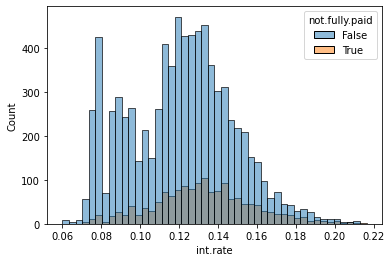

In [ ]:
numbers = df.select_dtypes(['int64', 'float64']).columns
numbers = numbers[:-3]

sns.histplot(data=df, x=numbers[0], hue='not.fully.paid')
print(df[df["credit.policy"]==0]["int.rate"].mean())
print(df[df["credit.policy"]==1]["int.rate"].mean())

The average interest rate of people who can't fully paid were about 13.8%; while average interest rate of people who fully paid were about 11.8%, a litte bit lower than people who can't fully paid.

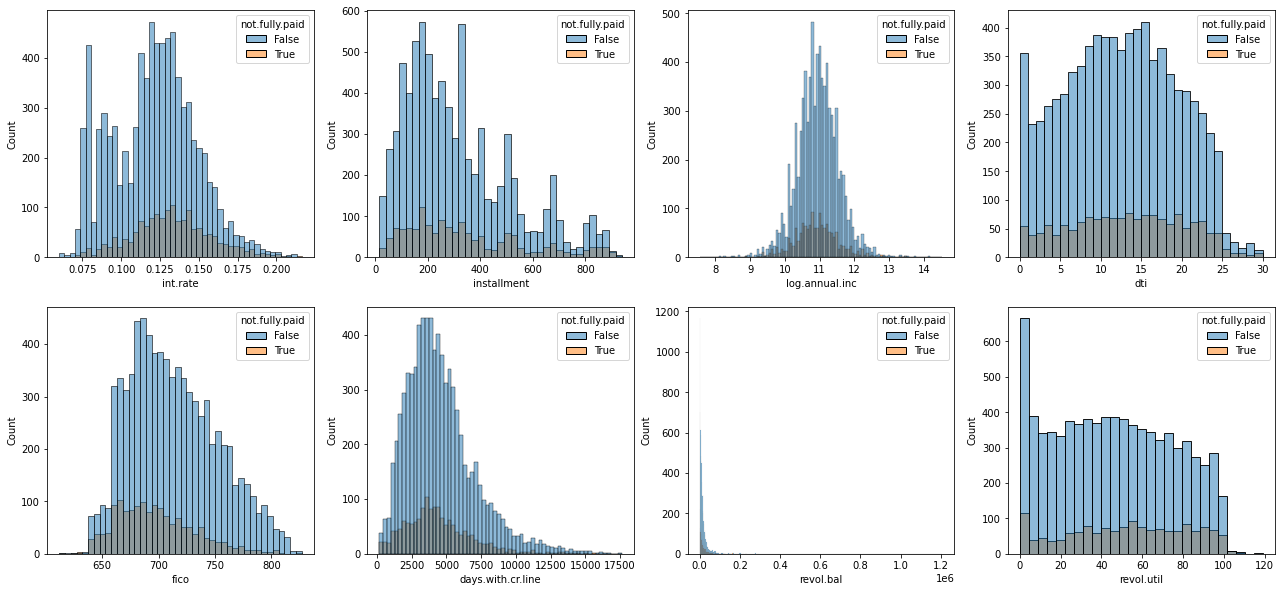

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(22,10))
ax=ax.ravel()

count=0
for i in numbers:
    sns.histplot(data=df, x=i, hue='not.fully.paid', ax=ax[count])
    count+=1

Unfortunately, both distributions have the same shape but in a different proportion, looking for a pattern here will be difficult. Let's group our target variable by these variables and see how the mean and standard deviation differ.

In [ ]:
df.groupby('not.fully.paid')[numbers].agg(['mean', 'std'])

int.rate           installment             log.annual.inc  \
                    mean       std        mean         std           mean   
not.fully.paid                                                              
False           0.120770  0.026692  314.574123  203.398688      10.941091   
True            0.132452  0.025495  342.785114  223.948527      10.885023   

                                dti                  fico             \
                     std       mean       std        mean        std   
not.fully.paid                                                         
False           0.604045  12.494413  6.855020  713.326911  38.223723   
True            0.666718  13.195838  7.006769  697.828441  33.756808   

               days.with.cr.line                  revol.bal                \
                            mean          std          mean           std   
not.fully.paid                                                              
False                4592.632624  2508.035500  16122.724425  29637.645740   
True                 4393.541259  2431.785491  21066.293542  49905.689359   

               revol.util             
                     mean        std  
not.fully.paid                        
False           45.759608  28.891285  
True            52.255075  29.057906

As expected, they do not differ a lot. The only concluson we can get here is that our target variable is almost equally distributed in each feature. Therefore, there's no relevant pattern for our model.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


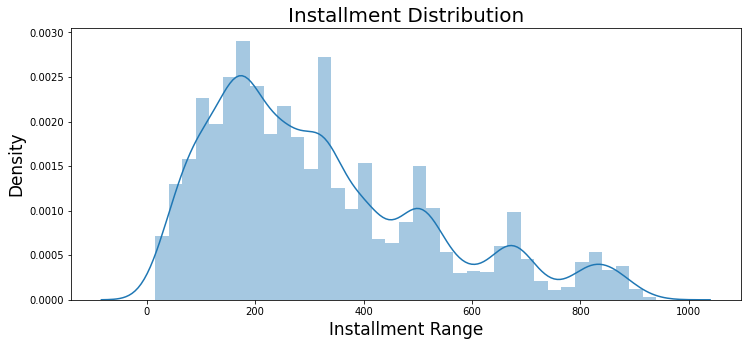

In [ ]:
plt.figure(figsize=(12,5))

sns.distplot(df['installment'])
plt.title("Installment Distribution", fontsize=20)
plt.xlabel("Installment Range", fontsize=17)
plt.ylabel("Density", fontsize=17)

plt.show()

The monthly payment owed by the borrower if the loan originates.
Nice. We can see that the peak of our distribution is ~200 USD monthly.

With this information, we can investigate the difference between , to find some interesting patterns of values

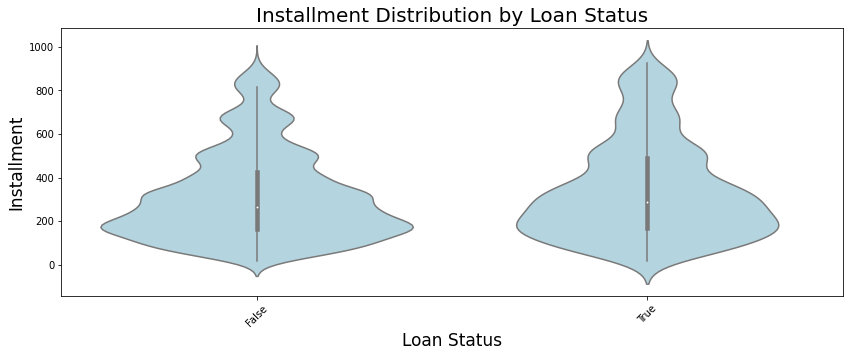

In [ ]:
plt.figure(figsize = (14,12))

plt.subplot(211)
g = sns.violinplot(x='not.fully.paid', y="installment",
                   data=df, color='lightblue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status", fontsize=17)
g.set_ylabel("Installment", fontsize=17)
g.set_title("Installment Distribution by Loan Status", fontsize=20)

plt.subplots_adjust(hspace = 0.5,top = 0.9)

plt.show()

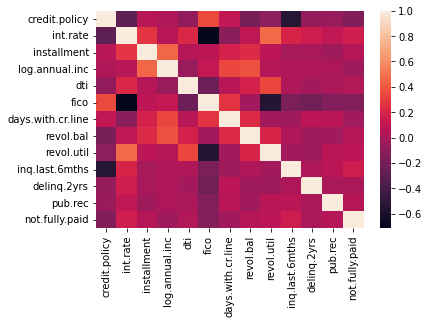

In [ ]:
sns.heatmap(df.corr())
#fico and int.rate have high correlation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


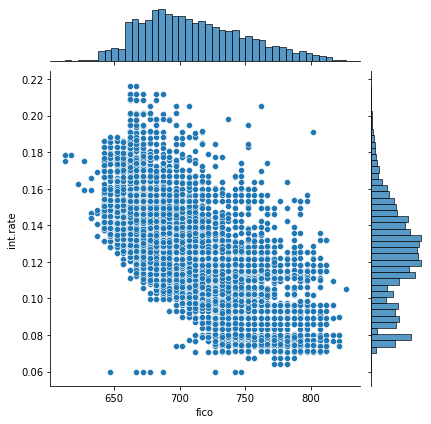

In [ ]:
sns.jointplot('fico','int.rate',data=df)
#Negative correlation

#Resample and feartures important

Our data is highly imbalanced, let's apply a resampling algorithm before normalizing the dataset. For this case, I'm going to apply a random oversampling algorithm, this will create synthethic data in the minority class.

In [ ]:
numbers = df.select_dtypes(['int64', 'float64', 'bool']).columns

X = df[numbers].iloc[:,:-1].values
y = df.iloc[:,-1].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
#We choose 5 features after test score (not show because all score are quite same)
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=5)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(5))

features = pd.DataFrame({'features':list(df[numbers].iloc[:,:-1].columns), 'select':list(mask)})
display(features.T)
features = list(features[features['select']==True]['features'])
print("The selected features are: " "\n")
display(features)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Test score: 0.835  number of features: 5


,0,1,2,3,4,5,6,7,8,9,10,11
features,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
select,False,False,True,False,True,False,True,True,True,False,False,False


The selected features are: 



['installment', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']

In [ ]:
features.append('not.fully.paid')

print("Working dataset", "\n")
df[features]

Working dataset 



,installment,dti,days.with.cr.line,revol.bal,revol.util,not.fully.paid
0,829.10,19.48,5639.958333,28854,52.1,False
1,228.22,14.29,2760.000000,33623,76.7,False
2,366.86,11.63,4710.000000,3511,25.6,False
3,162.34,8.10,2699.958333,33667,73.2,False
4,102.92,14.97,4066.000000,4740,39.5,False
...,...,...,...,...,...,...
9573,344.76,10.39,10474.000000,215372,82.1,True
9574,257.70,0.21,4380.000000,184,1.1,True
9575,97.81,13.09,3450.041667,10036,82.9,True
9576,351.58,19.18,1800.000000,0,3.2,True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


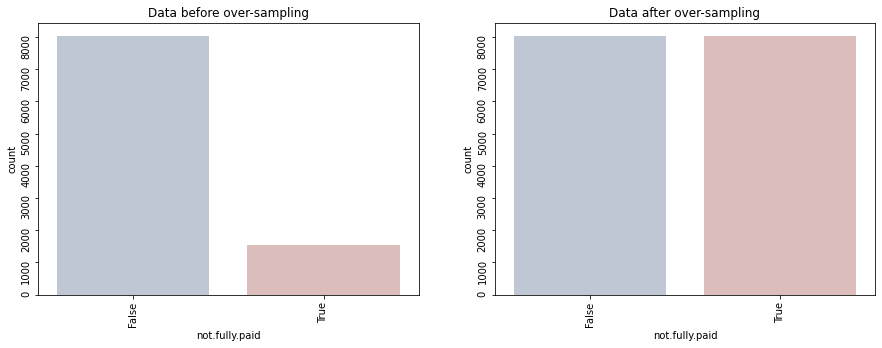

Data before over-sampling
False    8045
True     1533
Name: not.fully.paid, dtype: int64 

Data after over-sampling
False    8045
True     8045
Name: not.fully.paid, dtype: int64


In [ ]:
#As we see at first our data is imbalance so we will resampling
from imblearn.over_sampling import RandomOverSampler
# over-sampling
df_ros = df[features]
X = df_ros.iloc[:,:-1]
y = df_ros.iloc[:,-1]

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

df_ros = x_ros
df_ros['not.fully.paid'] = y_ros


#visualazing samples
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot('not.fully.paid', data=df, ax=ax[0], palette="vlag")
ax[0].tick_params(labelrotation=90)
ax[0].set_title("Data before over-sampling")

sns.countplot('not.fully.paid', data=df_ros, ax=ax[1], palette="vlag")
ax[1].tick_params(labelrotation=90)
ax[1].set_title("Data after over-sampling")

plt.show()

print("Data before over-sampling")
print(df['not.fully.paid'].value_counts(), "\n")

print("Data after over-sampling")
print(df_ros['not.fully.paid'].value_counts())

Now our data is balance after that we will train and predict model 

#Train_Test_Split

In [ ]:
df_model = df_ros
X = df_model.iloc[:,:-1].values
y = df_model.iloc[:,-1].values
#split data test 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Random Forest

In [ ]:
#Build RandomForest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
preds2=rf.predict(X_test)

In [ ]:
#Evaluate model accuracy
accuracy = round(rf.score(X_test,y_test) * 100,2)
print("Accuracy: {}".format(accuracy))

Accuracy: 96.31


In [ ]:
print(classification_report(y_test,preds2))
print(confusion_matrix(y_test,preds2))

              precision    recall  f1-score   support

       False       0.98      0.94      0.96      2444
        True       0.94      0.98      0.96      2383

    accuracy                           0.96      4827
   macro avg       0.96      0.96      0.96      4827
weighted avg       0.96      0.96      0.96      4827

[[2307  137]
 [  41 2342]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


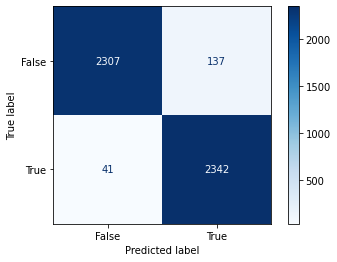

In [ ]:
plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


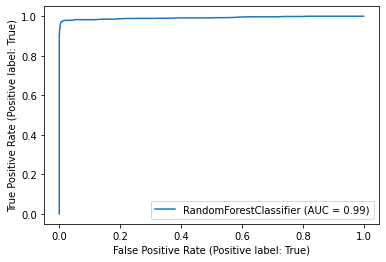

In [ ]:
plot_roc_curve(rf, X_test, y_test)

# Logistic Regression Model

In [ ]:

lr=LogisticRegression()
lr.fit(X_train,y_train)
preds4=lr.predict(X_test)
score = round(accuracy_score(y_test,preds4),2)*100
print("Accuracy: {}".format(score))

Accuracy: 54.0


In [ ]:
print(classification_report(y_test,preds4))
print(confusion_matrix(y_test,preds4))

              precision    recall  f1-score   support

       False       0.56      0.46      0.50      2444
        True       0.53      0.63      0.58      2383

    accuracy                           0.54      4827
   macro avg       0.55      0.55      0.54      4827
weighted avg       0.55      0.54      0.54      4827

[[1116 1328]
 [ 871 1512]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


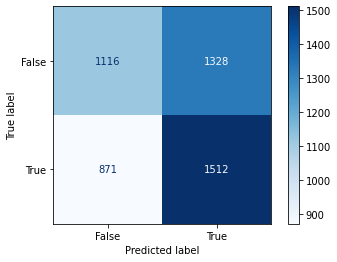

In [ ]:
plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


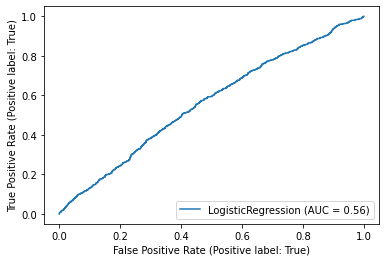

In [ ]:
plot_roc_curve(lr,X_test,y_test)

In [ ]:
ml_models = {
    'Random Forest': rf, 
    'Logistic Regrssion':lr
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.963
LOGISTIC REGRSSION             roc_auc_score: 0.546


In [ ]:
print(rf.feature_importances_)

[0.20158574 0.19379654 0.20904067 0.19768717 0.19788987]


We have achieved an acceptable score and confussion matrix. The feature importances shows why is so difficult to find a pattern in the data, all of the features have similar importance, which means that the model is a combination of fine tunnings from all of the features. Is hard to create a client profile given these features. But the algorithm can be useful when the bank operator enters the data in the system, the algorithm will tell the agents how probable it is for the client to fully pay or not.

#Conclusion
We applied machine learning methods to predict the probability that a requested loan on LendingClub will charge off. After training and evaluating three different models (logistic regression, random forest).We selected random forest because it have highest accuracy score, and this model obtained an AUROC score of 0.963 on a test set. 
We couldn't find any obervable pattern of data. The data the target variable is equally distributed in all the variables. It almost looks as if the dataset in synthetic.
Nevertheless, The the algorithm was able to reach a decent and more real test score (working with the imbalanced data would have yield a better but not real result), and was able to classify both outcomes of the target variable in the confusion matrix.
We couldn't meet the objective of creating a cliente profile, but the algorith could be use by agents to see how probable it is a client will pay or not, easing the decision process.